## Predictions on the dataset : ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
### update after revision of the datasets
### test data in respective file is what eval data
### from train data we have train and test data for the models
### data for distance based models is now scaled, and used the inverse scaler while plotting and metrcies

### setting the data paths

In [5]:
### since it's a regression problem so it means no smote is required and,
### since the train and test data is splited already so, no need for the train_test split from sklearn

In [66]:
path_for_trees_train = '../data/preprocessed/trees/train.csv'
path_for_trees_eval = '../data/preprocessed/trees/test.csv'
path_for_distance_train = '../data/preprocessed/distance/train.csv'
path_for_distance_eval = '../data/preprocessed/distance/test.csv'

### function to read, load and split the data

In [4]:
from sklearn.model_selection import train_test_split

In [67]:
def data_load_to_split(path_for_the_data, split = None) : 
    df = pd.read_csv(path_for_the_data)
    df.drop('Unnamed: 0', axis = 1, inplace = True)

    if not split : 
        return df
    
    X = df.drop('price', axis = 1)
    y = df['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.25)
    return X_train, X_test, y_train, y_test

### loading the data

In [68]:
#-----------for the distance based models
X_train_distance, X_test_distance, y_train_distance, y_test_distance = data_load_to_split(path_for_distance_train, split = True)

In [69]:
X_eval_distance = data_load_to_split(path_for_distance_eval, split = False)

In [41]:
# X_train_distance
# X_test_distance
# y_train_distance
# y_test_distance
# X_eval_distance

In [70]:
print(f"{X_train_distance.shape} : {y_train_distance.shape} :: {X_test_distance.shape} : {y_test_distance.shape} :: {X_eval_distance.shape}")

(8010, 14) : (8010,) :: (2671, 14) : (2671,) :: (2670, 14)


In [71]:
#--------------for the tree based models
X_train_tree, X_test_tree, y_train_tree, y_test_tree = data_load_to_split(path_for_trees_train, split = True)

In [72]:
X_eval_tree = data_load_to_split(path_for_trees_eval, split = False)

In [33]:
# X_train_tree
# X_test_tree
# y_train_tree
# y_test_tree
# X_eval_tree

In [73]:
print(f"{X_train_tree.shape} : {y_train_tree.shape} :: {X_test_tree.shape} : {y_test_tree.shape} :: {X_eval_tree.shape}")

(8010, 14) : (8010,) :: (2671, 14) : (2671,) :: (2670, 14)


### loading the scaler

In [74]:
path_for_scaler_for_price = '../scalers/scaler_for_price_only.pkl'

In [75]:
import joblib
scaler_price = joblib.load(path_for_scaler_for_price)

### writing the functions to plot and compare

In [38]:
### here for the tree based models and distance based models will be slight difference
### in the same function for the distance based models, I will use the inverse scaler as the data was scaled recently

In [35]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

In [39]:
def eval_metrices(y_test, y_pred) : 
    print(r2_score(y_test, y_pred))
    print(mean_squared_error(y_test, y_pred))
    print(mean_absolute_error(y_test, y_pred))
    print(root_mean_squared_error(y_test, y_pred))

In [40]:
def plot_graphs(y_test, y_pred, title_suffix=""):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             color='red', linewidth=2, label='Perfect Prediction Line')
    plt.title(f'Actual vs Predicted Values {title_suffix}')
    plt.legend()
    plt.grid(True)
   
    plt.subplot(1, 2, 2)
    plt.plot(y_test, label='Actual', color='blue', marker='o')
    plt.plot(y_pred, label='Predicted', color='red', marker='x')
    plt.title(f'Trend Comparison {title_suffix}')
    plt.legend()
    plt.grid(True)
    plt.show()


In [76]:
def plot_and_pred(model, X_train, y_train, X_test, y_test, scaler = None) :
    
    #------------- coomon in both parts
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #----------specifically for the distance models only
    if scaler is not None : 
        y_pred = scaler.inverse_transform(np.array(y_pred).reshape(-1, 1))
        y_test = scaler.inverse_transform(np.array(y_test).reshape(-1, 1))
    
    eval_metrices(y_test, y_pred)
    plot_graphs(y_test, y_pred)

## Testing on old data

### Algorithm #1 : Linear regression

### => without hypertunning

In [39]:
### there's no hypertunning available in case of the linear regression

In [60]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

0.5333934268950158
0.0017010723802331747
0.02674008808659156
0.04124405872647811


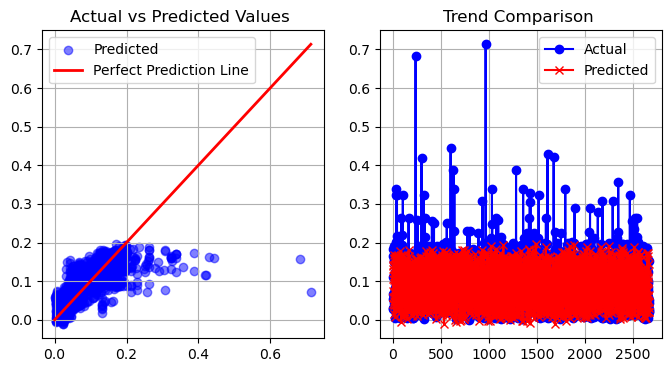

In [77]:
plot_and_pred(lr, X_train_distance, y_train_distance, X_test_distance, y_test_distance, scaler = scaler_price)

### Algorithm # 2 : SVM regressor

In [40]:
### now in general svm are already slow algorithms, but if we go the hypertunning, 
### the resources and time required will be very long

In [78]:
from sklearn.svm import SVR
svr = SVR()

0.4205830714521235
0.0021123365820450405
0.03519223410138911
0.04596016298975712


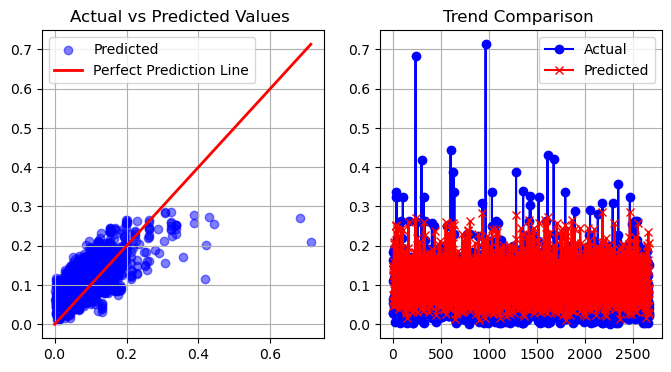

In [79]:
plot_and_pred(svr, X_train_distance, y_train_distance, X_test_distance, y_test_distance, scaler = scaler_price)

### Algorithm #3 : KNN

### without tunning

In [80]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

0.8163709975577593
0.0006694424002337939
0.013482715810272354
0.02587358498998146


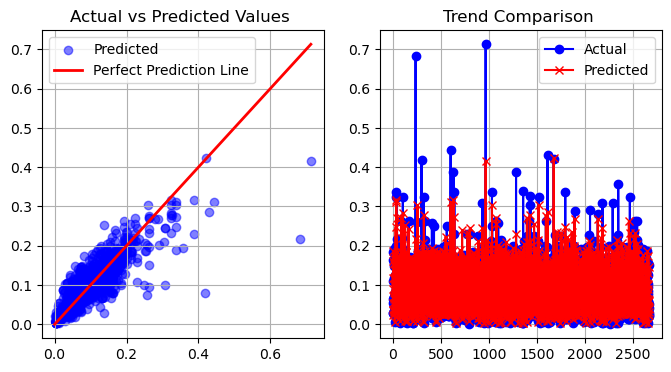

In [81]:
plot_and_pred(knn, X_train_distance, y_train_distance, X_test_distance, y_test_distance, scaler = scaler_price)

### with tunning

In [83]:
from sklearn.model_selection import GridSearchCV

In [82]:
parameter_knn = {
    'n_neighbors' : [3,4,5,6,7,8,9,10],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 
    'leaf_size' : [20,30,35,50,65]
}

In [84]:
knn_cv = GridSearchCV(knn, param_grid = parameter_knn, cv = 5, scoring = 'r2')
knn_cv.fit(X_train_distance, y_train_distance)
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 5, 'weights': 'distance'}
0.7773681792917961


c:\Users\lenovo\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


0.8288578127642543
0.0006239201601086742
0.012656635512382993
0.02497839386567267


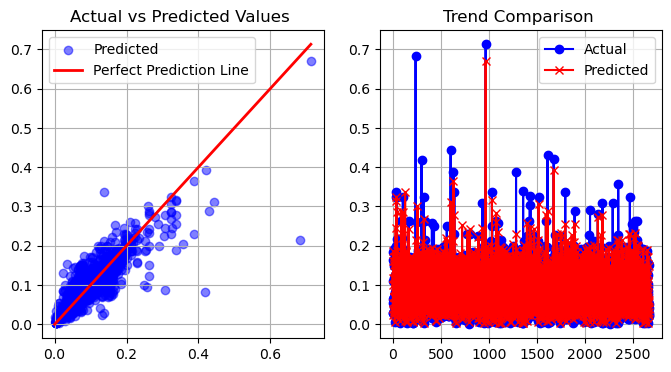

In [85]:
plot_and_pred(knn_cv, X_train_distance, y_train_distance, X_test_distance, y_test_distance, scaler = scaler_price)

### Algorithm #4 : Random forest regressor

In [59]:
### In this case as well I will also avoid hypertunning in general for the ensemble techniques 
### for the resources and also these algorithms perform the same in both cases

In [86]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

0.865399540221658
2966557.6568638464
696.296740992316
1722.3697793632605


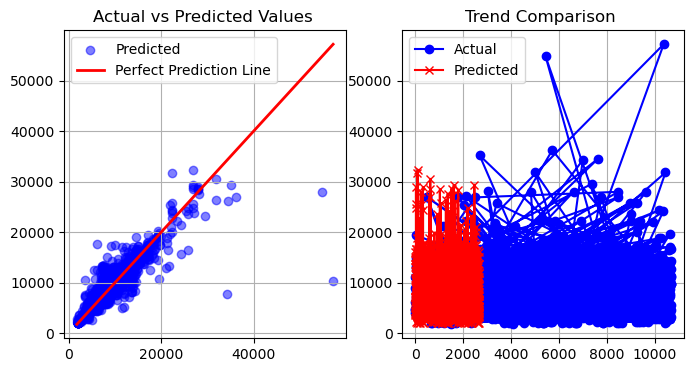

In [ ]:
plot_and_pred(rfr, X_train_tree, y_train_tree, X_test_tree, y_test_tree, scaler = None)

### Algorithm #5 : Decision tree regressor

In [89]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

0.8072606070087621
4247923.989257041
790.2969549482093
2061.0492447433276


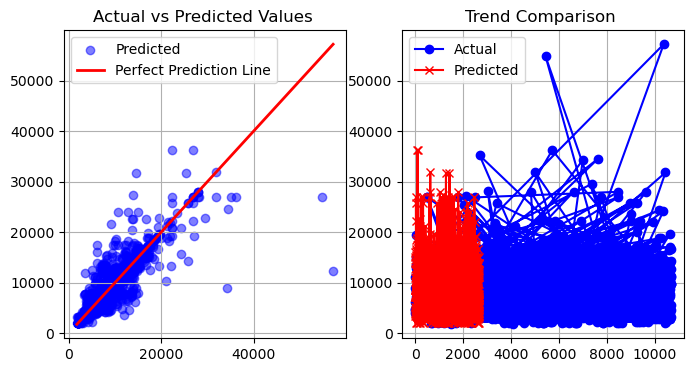

In [90]:
plot_and_pred(dtr, X_train_tree, y_train_tree, X_test_tree, y_test_tree, scaler = None)

### Algorithm #6 : Adaboost regression

In [91]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor()

0.3462673089550249
14408091.349430354
2918.3392705236915
3795.7991713775314


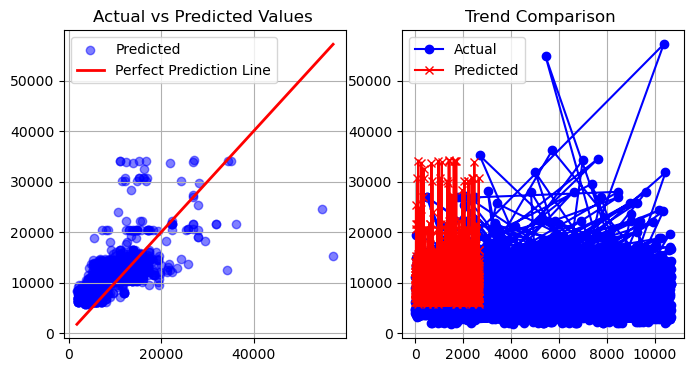

In [92]:
plot_and_pred(abr, X_train_tree, y_train_tree, X_test_tree, y_test_tree, scaler = None)

### Algorithm #7 : Gradient boost

In [93]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

0.7694149409572671
5082032.212877238
1345.70760934454
2254.336313170073


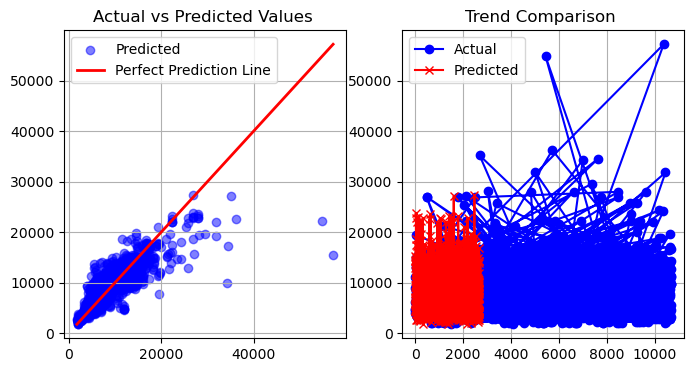

In [94]:
plot_and_pred(gbr, X_train_tree, y_train_tree, X_test_tree, y_test_tree, scaler = None)

## Predictions on the Eval dataset

In [ ]:
### -----starts tomorrow

In [55]:
### X_eval is basically where we don't have the price provided already
### from the results above it's clear that Random forest and decision Trees performed overall better
### so we will be taking into the account how much predictions differ from each other

### Decision Tree

In [32]:
y_pred_eval_dtr = dtr.predict(X_eval)
y_pred_eval_dtr

array([14714.,  4226., 12898., ..., 15764., 12677.,  7155.])

### Random forest regressor

In [33]:
y_pred_eval_rfr = rfr.predict(X_eval)
y_pred_eval_rfr

array([14714.  ,  4237.44, 12898.  , ..., 15772.57, 12927.07,  7606.51])

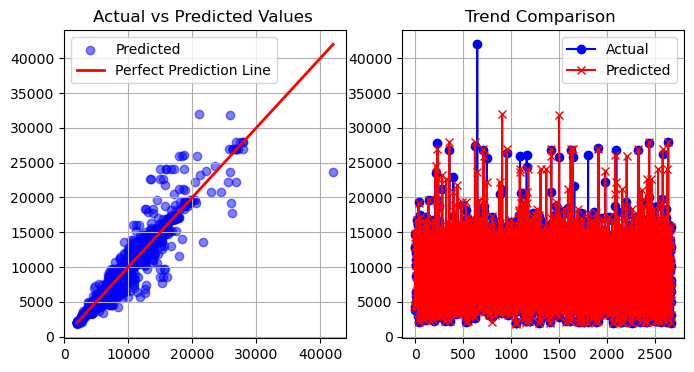

In [34]:
plot_graphs(y_pred_eval_rfr, y_pred_eval_dtr)

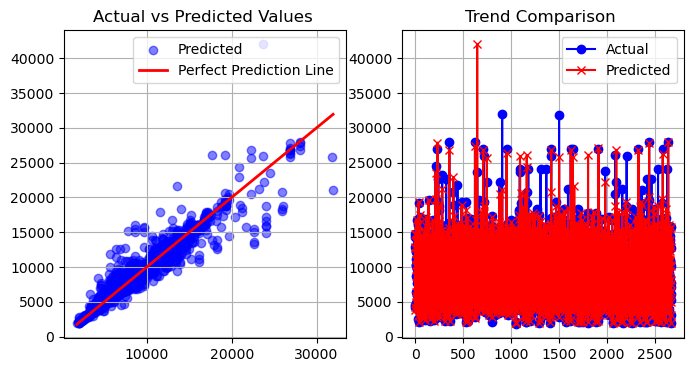

In [35]:
plot_graphs(y_pred_eval_dtr, y_pred_eval_rfr)

### combine plots function

In [40]:
def pred_on_eval(model, X_eval) : 
    y_pred_eval = model.predict(X_eval)
    # ------------------vs decision tree
    print('Vs Decision Tree')
    plot_graphs(y_pred_eval_dtr, y_pred_eval)
    #-------------------vs random forest
    print('Vs Random Forest')
    plot_graphs(y_pred_eval_rfr, y_pred_eval)

### 1. Linear regression

Vs Decision Tree


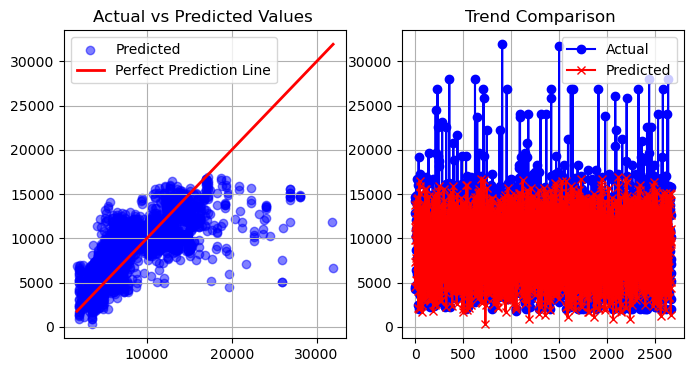

Vs Random Forest


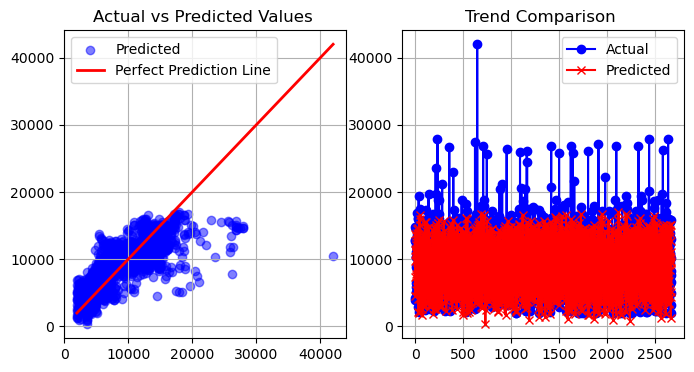

In [41]:
pred_on_eval(model = lr, X_eval = X_eval)

### 2. SVM Regressor

Vs Decision Tree


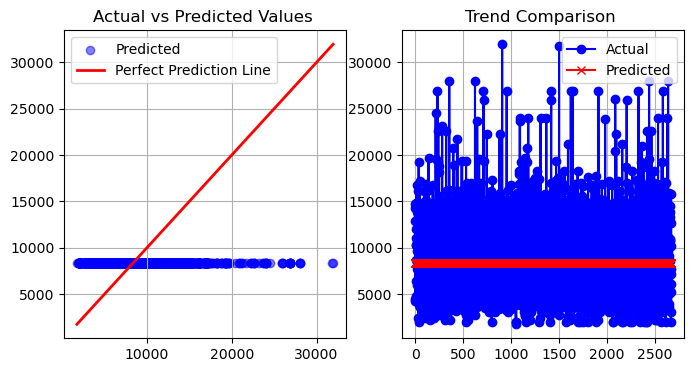

Vs Random Forest


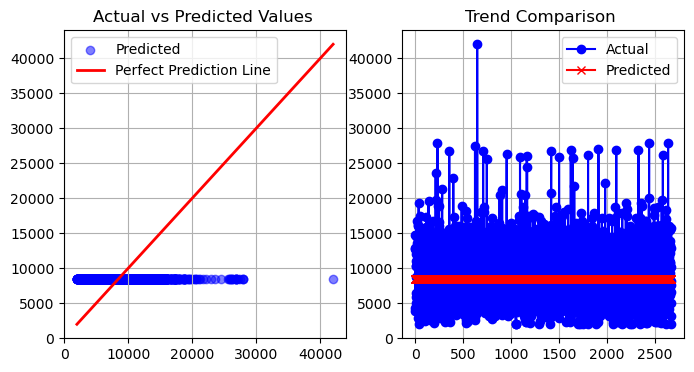

In [42]:
pred_on_eval(model = svr, X_eval = X_eval)

### 3. KNN neighbors

Vs Decision Tree


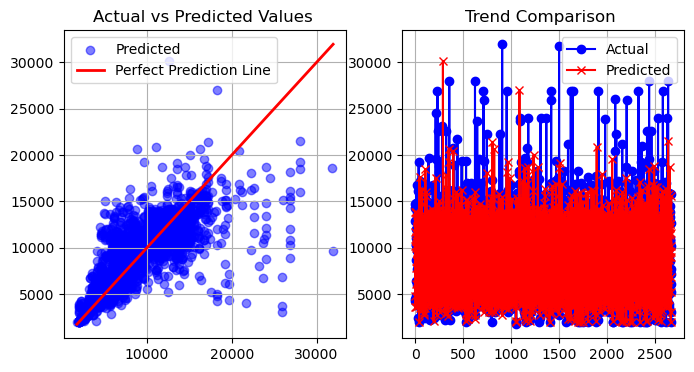

Vs Random Forest


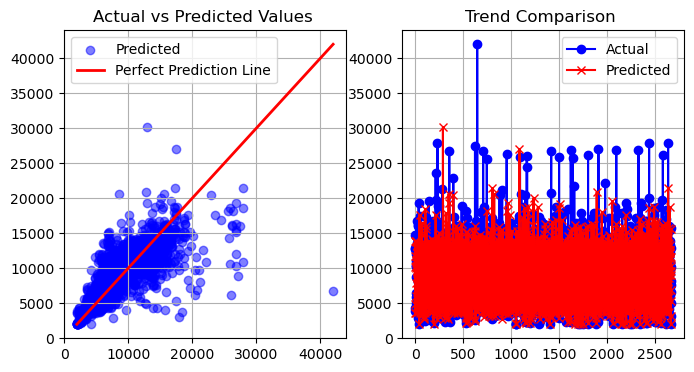

In [43]:
pred_on_eval(model = knn, X_eval = X_eval)

### 4. Adaboost regressor

Vs Decision Tree


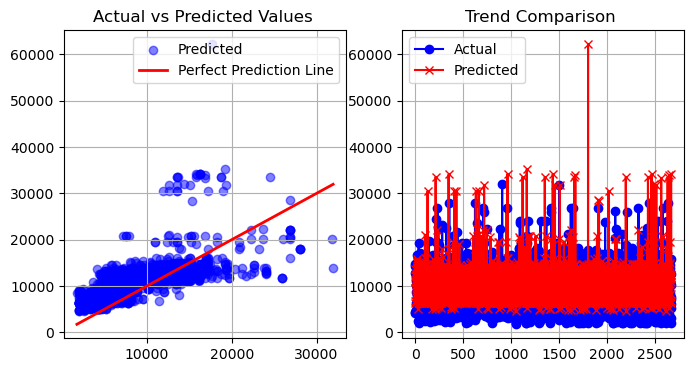

Vs Random Forest


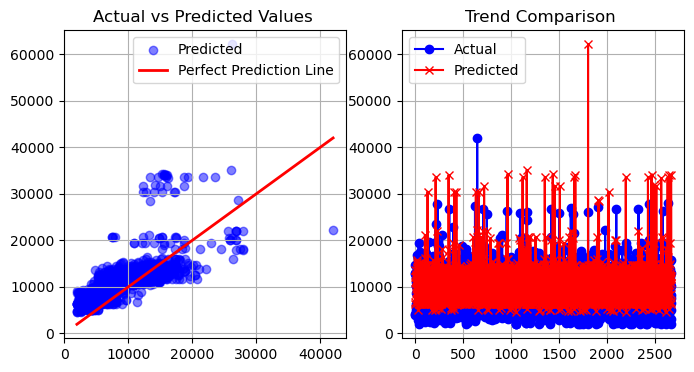

In [44]:
pred_on_eval(model = abr, X_eval = X_eval)

### 5. Gradient boost regressor

Vs Decision Tree


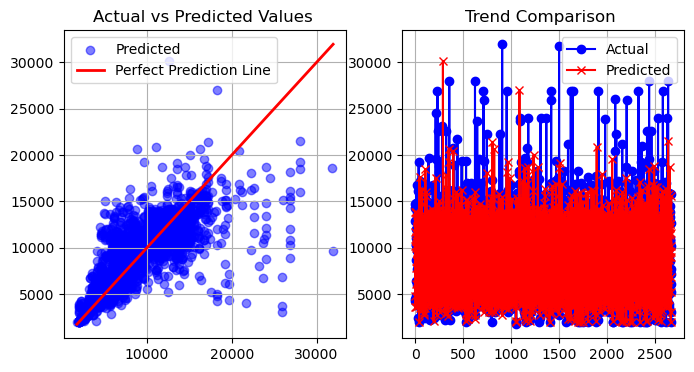

Vs Random Forest


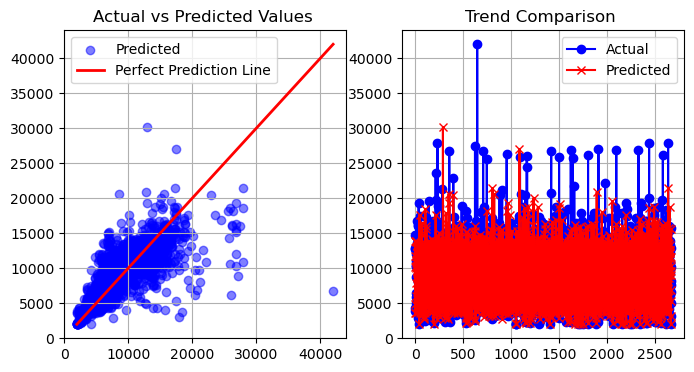

In [45]:
pred_on_eval(model = knn, X_eval = X_eval)